# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [2]:
# Loading all the libraries
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")



## Load data

In [3]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [6]:
# durations will be rounded up to the nearest minute
calls['duration_round'] = calls['duration'].apply(np.ceil)
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls

,id,user_id,call_date,duration,duration_round,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              137735 non-null  object 
 1   user_id         137735 non-null  int64  
 2   call_date       137735 non-null  object 
 3   duration        137735 non-null  float64
 4   duration_round  137735 non-null  float64
 5   month           137735 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 6.3+ MB


In [8]:
calls_merge = calls.groupby(['user_id','month']).agg({'duration_round': ['sum']})
calls_merge.head(50)

duration_round
                         sum
user_id month               
1000    12             124.0
1001    8              182.0
        9              315.0
        10             393.0
        11             426.0
        12             412.0
1002    10              59.0
        11             386.0
        12             384.0
1003    12            1104.0
1004    5              193.0
        6              275.0
        7              381.0
        8              354.0
        9              301.0
        10             365.0
        11             476.0
        12             427.0
1005    12             496.0
1006    11              10.0
        12              59.0
1007    8              456.0
        9              399.0
        10             645.0
        11             524.0
        12             617.0
1008    10             476.0
        11             446.0
        12             634.0
1009    5              534.0
        6              823.0
        7              880.0
        8              731.0
        9              776.0
        10             740.0
        11             714.0
        12             756.0
1010    3              429.0
        4              656.0
        5              532.0
        6              553.0
        7              698.0
        8              637.0
        9              601.0
        10             711.0
        11             258.0
1011    6              118.0
        7              499.0
        8              486.0
        9              484.0

In [9]:
calls_merge.describe()

,duration_round
,sum
count,2258.000000
mean,435.937555
std,231.972343
min,0.000000
25%,275.000000
50%,429.000000
75%,574.750000
max,1510.000000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
internet.head(20)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [12]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_merge = internet.groupby(['user_id','month']).agg({'mb_used': ['sum']})
internet_merge['mb_used'] = internet_merge['mb_used']/1024
internet_merge['gb_round'] = internet_merge['mb_used'].apply(np.ceil)

In [13]:
internet_merge

mb_used gb_round
                     sum         
user_id month                    
1000    12      1.856904      2.0
1001    8       6.756982      7.0
        9      13.002754     14.0
        10     21.807119     22.0
        11     18.070605     19.0
...                  ...      ...
1498    12     22.595400     23.0
1499    9      12.680430     13.0
        10     19.035576     20.0
        11     16.419756     17.0
        12     21.542197     22.0

[2277 rows x 2 columns]

In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
messages.head(20)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [16]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In [17]:
messages_merge = messages.groupby(['user_id','month']).agg({'user_id': ['count']})
messages_merge['texts'] = messages_merge['user_id'].apply(np.ceil)
messages_merge

user_id texts
                count      
user_id month              
1000    12         11  11.0
1001    8          30  30.0
        9          44  44.0
        10         53  53.0
        11         36  36.0
...               ...   ...
1496    9          21  21.0
        10         18  18.0
        11         13  13.0
        12         11  11.0
1497    12         50  50.0

[1806 rows x 2 columns]

In [18]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [19]:
plans.head(20)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [20]:
users.info

<bound method DataFrame.info of      user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..     

In [21]:
users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [22]:
users_merge = users.set_index('user_id')
users_merge

,first_name,last_name,age,city,reg_date,plan,churn_date
user_id,,,,,,,
1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...
1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN


We will confirm that all necessary datasets are correctly formatted and ready to merge.

In [23]:
users_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  500 non-null    object
 1   last_name   500 non-null    object
 2   age         500 non-null    int64 
 3   city        500 non-null    object
 4   reg_date    500 non-null    object
 5   plan        500 non-null    object
 6   churn_date  34 non-null     object
dtypes: int64(1), object(6)
memory usage: 31.2+ KB


In [24]:
calls_merge

duration_round
                         sum
user_id month               
1000    12             124.0
1001    8              182.0
        9              315.0
        10             393.0
        11             426.0
...                      ...
1498    12             339.0
1499    9              346.0
        10             385.0
        11             308.0
        12             496.0

[2258 rows x 1 columns]

In [25]:
internet_merge

mb_used gb_round
                     sum         
user_id month                    
1000    12      1.856904      2.0
1001    8       6.756982      7.0
        9      13.002754     14.0
        10     21.807119     22.0
        11     18.070605     19.0
...                  ...      ...
1498    12     22.595400     23.0
1499    9      12.680430     13.0
        10     19.035576     20.0
        11     16.419756     17.0
        12     21.542197     22.0

[2277 rows x 2 columns]

In [26]:
messages_merge

user_id texts
                count      
user_id month              
1000    12         11  11.0
1001    8          30  30.0
        9          44  44.0
        10         53  53.0
        11         36  36.0
...               ...   ...
1496    9          21  21.0
        10         18  18.0
        11         13  13.0
        12         11  11.0
1497    12         50  50.0

[1806 rows x 2 columns]

## Study plan conditions

In [27]:
# Print out the plan conditions and make sure they are clear for you

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user



In [28]:
# Calculate the number of calls made by each user per month. Save the result.

calls_merge

duration_round
                         sum
user_id month               
1000    12             124.0
1001    8              182.0
        9              315.0
        10             393.0
        11             426.0
...                      ...
1498    12             339.0
1499    9              346.0
        10             385.0
        11             308.0
        12             496.0

[2258 rows x 1 columns]

In [29]:
messages_merge['texts'] = messages_merge['user_id']
messages_merge.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1806 entries, (1000, 12) to (1497, 12)
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (user_id, count)  1806 non-null   int64  
 1   (texts, )         0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 36.9 KB


In [30]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_merge

mb_used gb_round
                     sum         
user_id month                    
1000    12      1.856904      2.0
1001    8       6.756982      7.0
        9      13.002754     14.0
        10     21.807119     22.0
        11     18.070605     19.0
...                  ...      ...
1498    12     22.595400     23.0
1499    9      12.680430     13.0
        10     19.035576     20.0
        11     16.419756     17.0
        12     21.542197     22.0

[2277 rows x 2 columns]

In [31]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

agg_df = calls_merge
agg_df['messages'] = messages_merge['user_id']
agg_df['gb'] =  internet_merge['mb_used']
agg_df.head(50)

duration_round messages         gb
                         sum                    
user_id month                                   
1000    12             124.0     11.0   1.856904
1001    8              182.0     30.0   6.756982
        9              315.0     44.0  13.002754
        10             393.0     53.0  21.807119
        11             426.0     36.0  18.070605
        12             412.0     44.0  18.915215
1002    10              59.0     15.0   6.398447
        11             386.0     32.0  18.891680
        12             384.0     41.0  14.058828
1003    12            1104.0     50.0  26.410293
1004    5              193.0      7.0   6.393760
        6              275.0     18.0  20.188301
        7              381.0     26.0  23.942012
        8              354.0     25.0  27.325918
        9              301.0     21.0  18.410859
        10             365.0     24.0  14.200811
        11             476.0     25.0  21.338652
        12             427.0     31.0  20.887979
1005    12             496.0     11.0  16.738447
1006    11              10.0     15.0   2.019893
        12              59.0    139.0  31.366035
1007    8              456.0     51.0  23.867070
        9              399.0     47.0  27.464795
        10             645.0     59.0  36.997686
        11             524.0     48.0  23.763672
        12             617.0     50.0  28.387969
1008    10             476.0     21.0  16.706045
        11             446.0     37.0  23.121797
        12             634.0     26.0  14.345049
1009    5              534.0      NaN  19.911523
        6              823.0      NaN  18.404199
        7              880.0      NaN  29.708643
        8              731.0      NaN  23.981953
        9              776.0      NaN  20.471094
        10             740.0      NaN  22.133633
        11             714.0      NaN  24.876396
        12             756.0      NaN  23.361914
1010    3              429.0      NaN  10.439473
        4              656.0      NaN  19.260098
        5              532.0      NaN  15.516133
        6              553.0      NaN  16.434873
        7              698.0      NaN  12.366318
        8              637.0      NaN  19.347500
        9              601.0      NaN  16.419658
        10             711.0      NaN  16.540801
        11             258.0      NaN   7.798428
1011    6              118.0     21.0   6.528428
        7              499.0     53.0  20.553135
        8              486.0     54.0  20.604854
        9              484.0     60.0  16.248496

In [32]:
agg_df.reset_index(inplace=True)
agg_df.set_index('user_id', inplace=True)
agg_df['city'] = users_merge['city']
agg_df['plan'] = users_merge['plan']
agg_df

,month,duration_round,messages,gb,city,plan
,,sum,,,,
user_id,,,,,,
1000,12,124.0,11.0,1.856904,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1001,8,182.0,30.0,6.756982,"Seattle-Tacoma-Bellevue, WA MSA",surf
1001,9,315.0,44.0,13.002754,"Seattle-Tacoma-Bellevue, WA MSA",surf
1001,10,393.0,53.0,21.807119,"Seattle-Tacoma-Bellevue, WA MSA",surf
1001,11,426.0,36.0,18.070605,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...
1498,12,339.0,NaN,22.595400,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf
1499,9,346.0,NaN,12.680430,"Orlando-Kissimmee-Sanford, FL MSA",surf


In [33]:
# Add the plan information

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [34]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 1000 to 1499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (month, )              2258 non-null   int64  
 1   (duration_round, sum)  2258 non-null   float64
 2   (messages, )           1773 non-null   float64
 3   (gb, )                 2243 non-null   float64
 4   (city, )               2258 non-null   object 
 5   (plan, )               2258 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 123.5+ KB


In [35]:
agg_df.reset_index(inplace=True)

In [36]:
agg_df.columns = ['user_id', 'month', 'total_call', 'messages', 'gb', 'city', 'plan']

In [37]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     2258 non-null   int64  
 1   month       2258 non-null   int64  
 2   total_call  2258 non-null   float64
 3   messages    1773 non-null   float64
 4   gb          2243 non-null   float64
 5   city        2258 non-null   object 
 6   plan        2258 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 123.6+ KB


In [38]:
agg_surf = agg_df.query('plan == "surf"')
agg_ult = agg_df.query('plan == "ultimate"')

In [39]:
agg_surf['gb_extra'] = agg_surf['gb'] - 15.36

In [40]:
agg_surf['gb_extra'] = agg_surf['gb_extra'].apply(np.ceil)

In [41]:
agg_surf['call_value'] = (agg_surf['total_call'] - 500)*.03

In [42]:
agg_surf['text_value'] = (agg_surf['messages'] - 50)* 0.03

In [43]:
agg_surf['gb_value'] = agg_surf['gb_extra'] * 10

In [44]:
agg_surf_neg = agg_surf[['call_value', 'text_value', 'gb_value']]

In [45]:
agg_surf_neg.fillna(0, inplace=True)
agg_surf_neg[agg_surf_neg < 0] = 0
agg_surf_neg

,call_value,text_value,gb_value
1,0.0,0.00,0.0
2,0.0,0.00,0.0
3,0.0,0.09,70.0
4,0.0,0.00,30.0
5,0.0,0.00,40.0
...,...,...,...
2253,0.0,0.00,80.0
2254,0.0,0.00,0.0
2255,0.0,0.00,40.0
2256,0.0,0.00,20.0


In [46]:
agg_surf['call_value'] = agg_surf_neg['call_value']
agg_surf['text_value'] = agg_surf_neg['text_value']
agg_surf['gb_value'] = agg_surf_neg['gb_value']

In [47]:
agg_surf['total_usd'] = 20 + agg_surf['call_value'] + agg_surf['text_value'] + agg_surf['gb_value']
agg_surf

,user_id,month,total_call,messages,gb,city,plan,gb_extra,call_value,text_value,gb_value,total_usd
1,1001,8,182.0,30.0,6.756982,"Seattle-Tacoma-Bellevue, WA MSA",surf,-8.0,0.0,0.00,0.0,20.00
2,1001,9,315.0,44.0,13.002754,"Seattle-Tacoma-Bellevue, WA MSA",surf,-2.0,0.0,0.00,0.0,20.00
3,1001,10,393.0,53.0,21.807119,"Seattle-Tacoma-Bellevue, WA MSA",surf,7.0,0.0,0.09,70.0,90.09
4,1001,11,426.0,36.0,18.070605,"Seattle-Tacoma-Bellevue, WA MSA",surf,3.0,0.0,0.00,30.0,50.00
5,1001,12,412.0,44.0,18.915215,"Seattle-Tacoma-Bellevue, WA MSA",surf,4.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,339.0,NaN,22.595400,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,8.0,0.0,0.00,80.0,100.00
2254,1499,9,346.0,NaN,12.680430,"Orlando-Kissimmee-Sanford, FL MSA",surf,-2.0,0.0,0.00,0.0,20.00
2255,1499,10,385.0,NaN,19.035576,"Orlando-Kissimmee-Sanford, FL MSA",surf,4.0,0.0,0.00,40.0,60.00
2256,1499,11,308.0,NaN,16.419756,"Orlando-Kissimmee-Sanford, FL MSA",surf,2.0,0.0,0.00,20.0,40.00


In [48]:
agg_ult['gb_extra'] = agg_ult['gb'] - 30.72

In [49]:
agg_ult['gb_extra'] = agg_ult['gb_extra'].apply(np.ceil)

In [50]:
agg_ult['call_value'] = (agg_ult['total_call'] - 3000)*.01

In [51]:
agg_ult['text_value'] = (agg_ult['messages'] - 1000)* 0.01

In [52]:
agg_ult['gb_value'] = agg_ult['gb_extra'] * 7

In [53]:
agg_ult

,user_id,month,total_call,messages,gb,city,plan,gb_extra,call_value,text_value,gb_value
0,1000,12,124.0,11.0,1.856904,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,-28.0,-28.76,-9.89,-196.0
19,1006,11,10.0,15.0,2.019893,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,-28.0,-29.90,-9.85,-196.0
20,1006,12,59.0,139.0,31.366035,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1.0,-29.41,-8.61,7.0
26,1008,10,476.0,21.0,16.706045,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,-14.0,-25.24,-9.79,-98.0
27,1008,11,446.0,37.0,23.121797,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,-7.0,-25.54,-9.63,-49.0
...,...,...,...,...,...,...,...,...,...,...,...
2223,1493,9,529.0,NaN,14.639814,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-16.0,-24.71,NaN,-112.0
2224,1493,10,450.0,NaN,15.946846,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-14.0,-25.50,NaN,-98.0
2225,1493,11,500.0,NaN,15.264434,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-15.0,-25.00,NaN,-105.0
2226,1493,12,473.0,NaN,14.930752,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-15.0,-25.27,NaN,-105.0


In [54]:
agg_ult_neg = agg_ult[['call_value', 'text_value', 'gb_value']]

In [55]:
agg_ult_neg.fillna(0, inplace=True)
agg_ult_neg[agg_ult_neg < 0] = 0
agg_ult_neg

,call_value,text_value,gb_value
0,0.0,0.0,0.0
19,0.0,0.0,0.0
20,0.0,0.0,7.0
26,0.0,0.0,0.0
27,0.0,0.0,0.0
...,...,...,...
2223,0.0,0.0,0.0
2224,0.0,0.0,0.0
2225,0.0,0.0,0.0
2226,0.0,0.0,0.0


In [56]:
agg_ult['call_value'] = agg_ult_neg['call_value']
agg_ult['text_value'] = agg_ult_neg['text_value']
agg_ult['gb_value'] = agg_ult_neg['gb_value']

In [57]:
agg_ult['total_usd'] = 70 + agg_ult['call_value'] + agg_ult['text_value'] + agg_ult['gb_value']
agg_ult

,user_id,month,total_call,messages,gb,city,plan,gb_extra,call_value,text_value,gb_value,total_usd
0,1000,12,124.0,11.0,1.856904,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,-28.0,0.0,0.0,0.0,70.0
19,1006,11,10.0,15.0,2.019893,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,-28.0,0.0,0.0,0.0,70.0
20,1006,12,59.0,139.0,31.366035,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1.0,0.0,0.0,7.0,77.0
26,1008,10,476.0,21.0,16.706045,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,-14.0,0.0,0.0,0.0,70.0
27,1008,11,446.0,37.0,23.121797,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,-7.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2223,1493,9,529.0,NaN,14.639814,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-16.0,0.0,0.0,0.0,70.0
2224,1493,10,450.0,NaN,15.946846,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-14.0,0.0,0.0,0.0,70.0
2225,1493,11,500.0,NaN,15.264434,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-15.0,0.0,0.0,0.0,70.0
2226,1493,12,473.0,NaN,14.930752,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-15.0,0.0,0.0,0.0,70.0


In [58]:
# Calculate the monthly revenue for each user
agg_surf


,user_id,month,total_call,messages,gb,city,plan,gb_extra,call_value,text_value,gb_value,total_usd
1,1001,8,182.0,30.0,6.756982,"Seattle-Tacoma-Bellevue, WA MSA",surf,-8.0,0.0,0.00,0.0,20.00
2,1001,9,315.0,44.0,13.002754,"Seattle-Tacoma-Bellevue, WA MSA",surf,-2.0,0.0,0.00,0.0,20.00
3,1001,10,393.0,53.0,21.807119,"Seattle-Tacoma-Bellevue, WA MSA",surf,7.0,0.0,0.09,70.0,90.09
4,1001,11,426.0,36.0,18.070605,"Seattle-Tacoma-Bellevue, WA MSA",surf,3.0,0.0,0.00,30.0,50.00
5,1001,12,412.0,44.0,18.915215,"Seattle-Tacoma-Bellevue, WA MSA",surf,4.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,339.0,NaN,22.595400,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,8.0,0.0,0.00,80.0,100.00
2254,1499,9,346.0,NaN,12.680430,"Orlando-Kissimmee-Sanford, FL MSA",surf,-2.0,0.0,0.00,0.0,20.00
2255,1499,10,385.0,NaN,19.035576,"Orlando-Kissimmee-Sanford, FL MSA",surf,4.0,0.0,0.00,40.0,60.00
2256,1499,11,308.0,NaN,16.419756,"Orlando-Kissimmee-Sanford, FL MSA",surf,2.0,0.0,0.00,20.0,40.00


In [59]:
agg_ult

,user_id,month,total_call,messages,gb,city,plan,gb_extra,call_value,text_value,gb_value,total_usd
0,1000,12,124.0,11.0,1.856904,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,-28.0,0.0,0.0,0.0,70.0
19,1006,11,10.0,15.0,2.019893,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,-28.0,0.0,0.0,0.0,70.0
20,1006,12,59.0,139.0,31.366035,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1.0,0.0,0.0,7.0,77.0
26,1008,10,476.0,21.0,16.706045,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,-14.0,0.0,0.0,0.0,70.0
27,1008,11,446.0,37.0,23.121797,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,-7.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2223,1493,9,529.0,NaN,14.639814,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-16.0,0.0,0.0,0.0,70.0
2224,1493,10,450.0,NaN,15.946846,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-14.0,0.0,0.0,0.0,70.0
2225,1493,11,500.0,NaN,15.264434,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-15.0,0.0,0.0,0.0,70.0
2226,1493,12,473.0,NaN,14.930752,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,-15.0,0.0,0.0,0.0,70.0


## Study user behaviour

### Calls

In [60]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

calls_users = calls.merge(users, on='user_id', how='left')
calls_users_surf = calls_users.query('plan == "surf"')
calls_users_ult = calls_users.query('plan == "ultimate"')
calls_users_surf

,id,user_id,call_date,duration,duration_round,month,first_name,last_name,age,city,reg_date,plan,churn_date
16,1001_0,1001,2018-09-06,10.06,11.0,9,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
17,1001_1,1001,2018-10-12,1.00,1.0,10,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
18,1001_2,1001,2018-10-17,15.83,16.0,10,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
19,1001_4,1001,2018-12-05,0.00,0.0,12,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
20,1001_5,1001,2018-12-13,6.27,7.0,12,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN
137731,1499_200,1499,2018-10-20,10.89,11.0,10,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN
137732,1499_201,1499,2018-09-21,8.12,9.0,9,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN
137733,1499_202,1499,2018-10-10,0.37,1.0,10,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


Text(0, 0.5, 'Average Call Time')

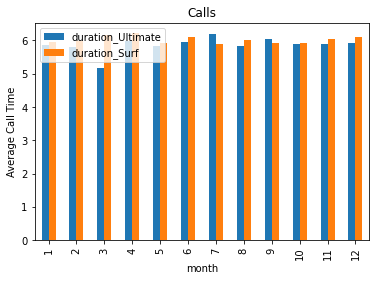

In [61]:
calls_avg_surf = calls_users_surf.pivot_table(
    index='month', values= 'duration', aggfunc= 'median')
calls_avg_ult = calls_users_ult.pivot_table(
    index='month', values= 'duration', aggfunc= 'median')
calls_avg_join = calls_avg_ult.join(calls_avg_surf, lsuffix = '_Ultimate', rsuffix = '_Surf')
calls_avg_join.plot(kind = 'bar', title = 'Calls')
plt.ylabel('Average Call Time')

In [62]:
calls_avg_join

,duration_Ultimate,duration_Surf
month,,
1,5.870,5.950
2,5.815,5.980
3,5.165,6.175
4,5.995,6.225
5,5.830,5.910
6,5.945,6.090
7,6.190,5.895
8,5.820,6.000
9,6.045,5.930


array([[<AxesSubplot:title={'center':'duration_Ultimate'}>,
        <AxesSubplot:title={'center':'duration_Surf'}>]], dtype=object)

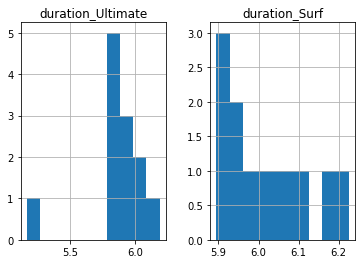

In [61]:
calls_avg_join.hist(bins=10)

The two plans are very similar in terms of average call durations. The average call time is very similar  for both plan types.

In [62]:
# Compare the number of minutes users of each plan require each month.
agg_ult_pivot = agg_ult.pivot_table(
    index='month', values= 'total_call', aggfunc= 'median')
agg_surf_pivot = agg_surf.pivot_table(
    index='month', values= 'total_call', aggfunc= 'median')
agg_calls_total = agg_ult_pivot.join(agg_surf_pivot, rsuffix='_Surf', lsuffix='_Ultimate')

Text(0.5, 0, 'Month')

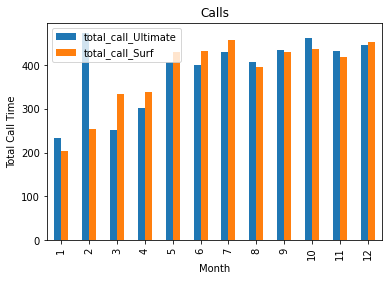

In [63]:
agg_calls_total.plot(kind='bar', title = 'Calls')
plt.ylabel("Total Call Time")
plt.xlabel("Month")

array([[<AxesSubplot:title={'center':'total_call_Ultimate'}>,
        <AxesSubplot:title={'center':'total_call_Surf'}>]], dtype=object)

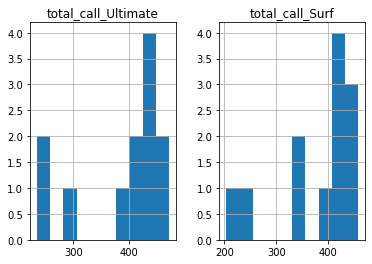

In [64]:
agg_calls_total.hist(bins=10)

This bar plot shows that the number of minutes used by users of each plan is relatively similar. The number of minutes needed typically increases as the year goes on with a small amount of variation.

### Messages

In [65]:
# Compare the number of messages users of each plan tend to send each month
piv_ult_mess = agg_ult.pivot_table(
    index='month', values= 'messages', aggfunc= 'median')
piv_surf_mess = agg_surf.pivot_table(
    index='month', values= 'messages', aggfunc= 'median')
mess_plot = piv_ult_mess.join(piv_surf_mess, lsuffix = '_Ultimate', rsuffix = '_Surf')

<AxesSubplot:xlabel='month'>

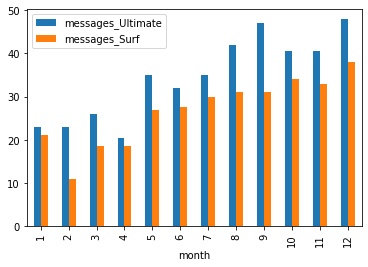

In [66]:
mess_plot.plot(kind='bar')

array([[<AxesSubplot:title={'center':'messages_Ultimate'}>,
        <AxesSubplot:title={'center':'messages_Surf'}>]], dtype=object)

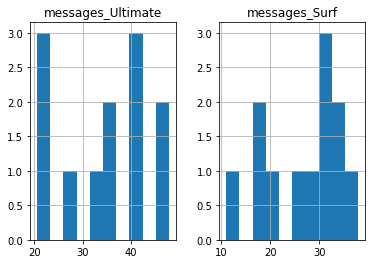

In [78]:
mess_plot.hist(bins=10)

Ultimate plan users consistently use more messages than Surf plan users. This makes sense as their plan comes with many more messages included.

### Internet

In [68]:
piv_ult_gb = agg_ult.pivot_table(
    index='month', values= 'gb', aggfunc= 'median')
piv_surf_gb = agg_surf.pivot_table(
    index='month', values= 'gb', aggfunc= 'median')
gb_plot = piv_ult_gb.join(piv_surf_gb, lsuffix = '_Ultimate', rsuffix = '_Surf')

<AxesSubplot:xlabel='month'>

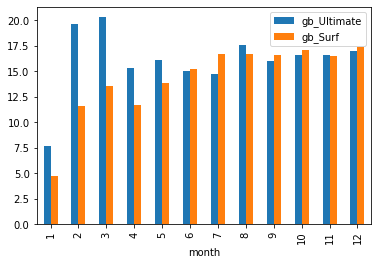

In [69]:
gb_plot.plot(kind='bar')

array([[<AxesSubplot:title={'center':'gb_Ultimate'}>,
        <AxesSubplot:title={'center':'gb_Surf'}>]], dtype=object)

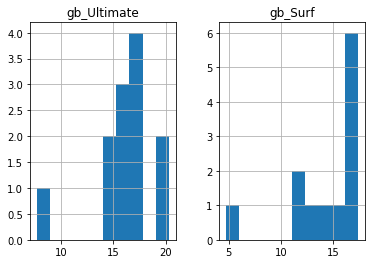

In [70]:
gb_plot.hist(bins=10)

Ultimate users consumed more data towards the beginning of the year but by the end of the year users of both plans consumed very similar amounts of data.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [71]:
piv_ult_rev = agg_ult.pivot_table(
    index='month', values= 'total_usd', aggfunc= 'mean')
piv_surf_rev = agg_surf.pivot_table(
    index='month', values= 'total_usd', aggfunc= 'mean')
rev_plot = piv_ult_rev.join(piv_surf_rev, lsuffix = '_Ultimate', rsuffix = '_Surf')

<AxesSubplot:xlabel='month'>

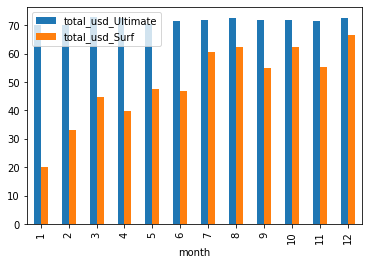

In [72]:
rev_plot.plot(kind='bar')

The revenue for Ultimate (the more expensive plan) seems to generally stay to what the base cost of the plan is. The base cost of the plan is 70 per month and the revenue does not tend to get much higher than that on average. The surf plan on the other hand has much more variable rates of revenue. Although the total income from the plan is typically lower than the for the Ultimate plan, users frequently go over their allotted calls/data/texts and the income is much higher than the base cost of 20 per month. Overall, the Ultimate plan consistently brings in more revenue.

## Test statistical hypotheses

Null Hypothesis = Average revenue from users of Ultimate equals the average revenue from users of Surf.

Alternative Hypothesis = Average revenue from users of Ultimate does not equal the average revenue from users of Surf.

In [73]:
# Test the hypotheses
sample_surf = agg_surf['total_usd']
sample_ult = agg_ult['total_usd']

alpha = 0.075
results = st.ttest_ind(sample_surf, sample_ult)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.5042708993769098e-12
We reject the null hypothesis


In [74]:
means = {'avg_surf_revenue': [sample_surf.mean()], 'avg_ult_revenue': [sample_ult.mean()]}
means_df = pd.DataFrame(data=means)
means_df

,avg_surf_revenue,avg_ult_revenue
0,57.911922,72.002805


We can conclude that the average revenue from Surf plan users is significantly less than the average revenue from Ultimate plan users. 

Null Hypothesis = Average revenue from users from NY equals the average revenue from all other users.

Alternative Hypothesis = Average revenue from users from NY does not equal the average revenue from all other users.

This will be tested with both data plans.

In [75]:
# Test the hypotheses
agg_ny_surf = agg_surf.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
agg_ny_ult = agg_ult.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
agg_notny_surf = agg_surf.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
agg_notny_ult = agg_ult.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

sample_ny_surf = agg_ny_surf['total_usd']
sample_notny_surf = agg_notny_surf['total_usd']

alpha = 0.075
results_2 = st.ttest_ind(sample_ny_surf, sample_notny_surf)

print('p-value: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.10518699090806465
We can't reject the null hypothesis


The average revenue from NY Surf users is not significantly different than the average revenue from Surf users outside NY.

In [76]:
sample_ny_ult = agg_ny_ult['total_usd']
sample_notny_ult = agg_notny_ult['total_usd']

alpha = 0.075
results_3 = st.ttest_ind(sample_ny_ult, sample_notny_ult)

print('p-value: ', results_3.pvalue)

if results_3.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.057932526211944384
We reject the null hypothesis


In [77]:
means_ny = {'avg_surf_rev_ny': [sample_ny_surf.mean()], 'avg_surf_rev_not_ny': [sample_notny_surf.mean()],'avg_ult_rev_ny': [sample_ny_ult.mean()], 'avg_ult_rev_not_ny': [sample_notny_ult.mean()]}
means_ny_df = pd.DataFrame(data=means_ny)
means_ny_df

,avg_surf_rev_ny,avg_surf_rev_not_ny,avg_ult_rev_ny,avg_ult_rev_not_ny
0,53.574365,58.987553,74.375,71.768875


The average revenue from NY Ultimate users is significantly higher than the average revenue from Ultimate users outside NY.

## General conclusion

Despite the Surf plan having lower allowances for calls, texts, and internet data, the average usage was not drastically different than the Ultimate plan. For calls, the average duration of calls was actually higher for Surf users. However, the total monthly duration of calls were about the same for both plans. In terms of text messages, Ultimate users consistently used more text messages than Surf users. For data, the beginning of the year saw a higher data usage by Ultimate users but eventually the data usage evened out between the two plans. In terms of revenue, the Ultimate plan consistently earned higher revenue throughout the year but the Surf plan started to close the gap by the end of the year.

All in all, from the consumers perspective it would most likely make more sense to get the Surf plan as typical usage shows that Surf users can use about the same amount of resources as Ultimate users but all in all pay much less. However from Megalines perspective, they should promote the Ultimate plan most as it consistently delivers much higher levels of revenue than the Surf plan.